# Visualisation of the uncertainty in the baseline scenario
Script to visualise the uncertainty for the baseline results. Figure 4 in the new version 1.0 of the paper (were two seperate figures 4 and 5 before)

In [1]:
import sys
sys.path.append("..") #import folder which is one level higher

import geopandas as gpd
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt
import numpy as np
import os as os
import pandas as pd
import seaborn as sns

from tqdm import tqdm

from utils_functions import load_config
from postproc_functions import *

pd.set_option('max_columns', 100)

### LOAD THE POSTPROCESSED DATA (OBJECT-BASED)

In [2]:
#Load all the postprocessed data:
pp_out_path = load_config()['paths']['postproc_output']
baseline_results = os.path.join(pp_out_path,'baseline')

#super_region = "EU_28"
############### CHOOSE YOUR PLOT SETTINGS HERE ###############
#regions = NUTS_3_EU28_cleaned()
#regions = post.NUTS_up(super_region,True)
##############                                 ###############


NUTS0 = NUTS_0_list(EU28=True,EFTA=True, CAND=True) #draw the list of NUTS-0 regions
NUTS0 = [e for e in NUTS0 if e not in ['IS','MT','CY','TR']] #drop Iceland, Malta, Turkey and Cyprus for now
NUTS3_lst = []
for N0 in NUTS0:
    NUTS3_lst.extend(NUTS_up(N0,True)) #find all the correspondign NUTS-3 regions

regions = [e for e in NUTS3_lst if e not in NUTS_3_remote()]
    #remove all the NUTS-3 regions we don't want to plot

### LOAD AND STRUCTURE THE OSM LIGHTING MIX RESULTS WHICH HAVE ALREADY BEEN POSTPROCESSED
df = pd.DataFrame()
exceptions = []
for region in tqdm(regions):
    try:
        df = df.append(pd.read_pickle(os.path.join(baseline_results,"{}_EAD_roadtype_nomix.pkl".format(region))))
    except Exception as e:
        exceptions.append(str(region)+str(e))
        
#for e in exceptions:
#    print(e)

100%|██████████████████████████████████████████████████████████████████████████████| 1420/1420 [00:28<00:00, 49.77it/s]


In [3]:
df2 = aggregate_tuplecollection(df,df.columns[0:-1],df.columns[-1]) # the last argument does not make sense in this application
df3 = df2.drop('NUTS-3',axis=1)
df3 = df3.drop(['none','track'], axis=0)
df_HZ = df3['EAD_HZ']
df3 = df3.drop(['EAD_HZ'],axis=1) 

In [4]:
df4 = df3.agg(sum_tuples)
df4

EAD_C1    (22357527.558437817, 56410469.60677498, 905595...
EAD_C2    (27785996.02038756, 70619505.90212704, 1134530...
EAD_C3    (5686646.067477612, 14497189.710982513, 233077...
EAD_C4    (47957074.98287175, 122160319.3940059, 1963635...
EAD_C5    (17920241.935722627, 26880362.88968953, 358404...
EAD_C6    (137885572.9806513, 206828344.5772896, 2757711...
dtype: object

### Prepare the Huizinga df for plotting

In [5]:
df_HZ = df_HZ.to_frame().T

In [6]:
df_HZ.index = ['(3) Object-based with Huizinga']
df_HZ = df_HZ.reindex(columns=['motorway','trunk','primary','secondary','tertiary','other']) 
    # 'track' and 'none' are automatically removed from the data if they are not reindexed!
#df_HZ = df_HZ*10**(-6)

df_HZ = df_HZ[df_HZ.columns[::-1]] #reverse the order of the columns
df_HZ

road_type,other,tertiary,secondary,primary,trunk,motorway
(3) Object-based with Huizinga,9.491013e+07,3.263976e+07,3.599874e+07,2.950171e+07,1.560097e+07,1.983467e+07


## Load the litmix data

In [7]:
#Load all the postprocessed data:

### LOAD AND STRUCTURE THE OSM LIGHTING MIX RESULTS WHICH HAVE ALREADY BEEN POSTPROCESSED
df = pd.DataFrame()
exceptions2 = []
for region in tqdm(regions):
    try:
        df = df.append(pd.read_pickle(os.path.join(baseline_results,"{}_EAD_roadtype_litmix.pkl".format(region))))
    except Exception as e:
        exceptions2.append(str(region)+str(e))
        
#for e in exceptions2:
    #print(e)

100%|██████████████████████████████████████████████████████████████████████████████| 1420/1420 [00:22<00:00, 63.66it/s]


In [8]:
df

,EAD_HZ,EAD_lowflow,EAD_highflow,NUTS-3
road_type,,,,
other,1641.648614,182.461573,1324.642547,AL031
primary,429.032884,129.578202,988.104944,AL031
secondary,13948.654082,3090.411536,21721.296030,AL031
tertiary,155.633408,22.829663,161.988989,AL031
track,1056.564644,14.053333,102.432959,AL031
...,...,...,...,...
primary,7211.116854,3026.501124,24188.177528,UKJ36
secondary,3296.362921,403.117416,3225.175281,UKJ36
tertiary,3479.275281,407.034270,3256.238764,UKJ36


In [9]:
#dfA = aggregate_tuplecollection(df,df.columns[0:-1],df.columns[-1]) # the last argument does not make sense in this application
dfA = df.copy()
dfA.drop(['NUTS-3','EAD_HZ'],axis=1,inplace=True)
dfA.drop(['none','track'],axis=0,inplace=True)
dfB = dfA.mean(axis=1)

In [10]:
dfB.sum(axis=0)

230507738.07982337

In [11]:
dfC = dfA.groupby('road_type').sum()
dfC

,EAD_lowflow,EAD_highflow
road_type,,
motorway,1.906661e+07,9.641305e+07
other,1.241078e+07,9.599448e+07
primary,1.175196e+07,8.961037e+07
secondary,7.905375e+06,6.089985e+07
tertiary,3.772363e+06,2.926642e+07
trunk,5.077720e+06,2.884649e+07


In [12]:
dfD = dfC.mean(axis=1)
100 * dfD/dfD.sum()

road_type
motorway     25.048977
other        23.514453
primary      21.986753
secondary    14.924711
tertiary      7.166523
trunk         7.358583
dtype: float64

In [13]:
dfD.sum()

230507738.07982352

In [14]:

#df3 = df3.drop(['none','track'], axis=0)
print(dfB)
dfB.mean(axis=0)

road_type
other          753.552060
primary        558.841573
secondary    12405.853783
tertiary        92.409326
other         2914.072509
                 ...     
other         5051.957022
primary      13607.339326
secondary     1814.146348
tertiary      1831.636517
trunk         1644.300000
Length: 6317, dtype: float64


36490.064600256985

In [15]:
dfA*10**(-6)

,EAD_lowflow,EAD_highflow
road_type,,
other,0.000182,0.001325
primary,0.000130,0.000988
secondary,0.003090,0.021721
tertiary,0.000023,0.000162
other,0.000683,0.005146
...,...,...
other,0.001126,0.008978
primary,0.003027,0.024188
secondary,0.000403,0.003225


In [16]:
litmix_avg = dfA.mean(axis=1) #average of the litmix

In [17]:
litmix_avg

road_type
other          753.552060
primary        558.841573
secondary    12405.853783
tertiary        92.409326
other         2914.072509
                 ...     
other         5051.957022
primary      13607.339326
secondary     1814.146348
tertiary      1831.636517
trunk         1644.300000
Length: 6317, dtype: float64

In [18]:
litmix_avg.mean()

36490.064600256985

## Load the sampled data

In [19]:
## Load the sampled data
df = pd.DataFrame()
exceptions3 = []

for region in tqdm(regions):
    try:
        df = df.append(pd.read_pickle(os.path.join(baseline_results,"{}_EAD_total_sampled.pkl".format(region))))
    except Exception as e:
        exceptions3.append(str(region)+str(e))

df_samples = df.copy()
df_samples_sum = df_samples.sum(axis=0)

100%|██████████████████████████████████████████████████████████████████████████████| 1420/1420 [00:23<00:00, 59.50it/s]


In [20]:
df_samples_sum.describe( percentiles=[0.05,.25, .5, .75,0.95])

count    1.000000e+02
mean     2.463519e+08
std      8.432779e+07
min      3.978342e+07
5%       1.021110e+08
25%      1.960009e+08
50%      2.485515e+08
75%      2.974329e+08
95%      3.653441e+08
max      4.739586e+08
dtype: float64

In [21]:
df_samples_sum.median()

248551502.03247124

In [22]:
mean_confidence_interval(df_samples_sum,confidence=0.95)

NameError: name 'mean_confidence_interval' is not defined

In [ ]:
df_samples_sum.mean()*10**(-6)

In [ ]:
6.8/21.5*100

## Left-hand panel LUISA part (run stuff below plot first)

### LUISA

In [ ]:
df_inf_N0_agg.rename(mapper=sum_labels, inplace=True, axis=1)
df10 = df_inf_N0_agg
#df11 = df10.loc[df10.index==super_region]
df11 = pd.DataFrame(df10.sum(axis=0))
df11 = df11.T
df11

In [40]:
#Total damage according to the grid-based method (LISFLOOD + LUISA)
df11.sum(axis=1)

0    3.070756e+08
dtype: float64

### CORINE

In [41]:
df_inf2_N0_agg.rename(mapper=sum_labels, inplace=True, axis=1)
df20 = df_inf2_N0_agg.copy()
df21 = pd.DataFrame(df20.sum(axis=0))
df21 = df21.T
df21

,Road and rail \n networks and \n associated land,Urban fabric,Industrial or \n commercial \n units,Water,Other
0,1.471716e+07,8.719265e+07,5.797679e+07,3.438308e+08,2.810704e+07


In [42]:
#Merge the CORINE and LUISA results
#df200
df200 = df21.append(df11,sort=False)
df200.index = ['(1) CORINE','(2) LUISA']
df200

,Road and rail \n networks and \n associated land,Urban fabric,Industrial or \n commercial \n units,Water,Other
(1) CORINE,1.471716e+07,8.719265e+07,5.797679e+07,3.438308e+08,2.810704e+07
(2) LUISA,1.477832e+08,5.040596e+07,6.960133e+07,NaN,3.928506e+07


## Prepare boxplots to visualise uncertainty in damage curves (middle panel)

In [43]:
#for now, ignore sophisticated function [later to replace using the lighting mix]
lows_soph = sum_tuples([df4['EAD_C1'],df4['EAD_C5']]) #not used (hardly any difference on total?)
highs_soph = sum_tuples([df4['EAD_C2'],df4['EAD_C6']]) #not used (hardly any difference on total?)
lows_simple = sum_tuples([df4['EAD_C3'],df4['EAD_C5']])
highs_simple = sum_tuples([df4['EAD_C4'],df4['EAD_C6']])

In [44]:
lows_soph = tuple(x * 10**(-6) for x in lows_soph)
highs_soph = tuple(x * 10**(-6) for x in highs_soph)
lows_simple = tuple(x * 10**(-6) for x in lows_simple)
highs_simple = tuple(x * 10**(-6) for x in highs_simple)

In [45]:
#for simple road accessories, the average of the low-flow and the high-flow curve
print((lows_simple[2] + highs_simple[2])/2)

265.6414532004135


In [46]:
low_soph = {'label' : 'Low flow [Curve 1 and 5]',
       'mean' : 14,
       'whislo' : lows_simple[0],
       'q1' : lows_simple[1],
       'med' : lows_simple[2],
       'q3' : lows_simple[3],
       'whishi' : lows_simple[4]}

high_soph = {'label' : 'High flow [Curve 2 and 6]',
       'mean' : highs_simple[0],
       'whislo' : highs_simple[0],
       'q1' : highs_simple[1],
       'med' : highs_simple[2],
       'q3' : highs_simple[3],
       'whishi' : highs_simple[4]}

low_simple = {'label' : 'Low flow \n[Curve 3 and 5]',
       'mean' : 14,
       'whislo' : lows_simple[0],
       'q1' : lows_simple[1],
       'med' : lows_simple[2],
       'q3' : lows_simple[3],
       'whishi' : lows_simple[4]}

high_simple = {'label' : 'High flow \n[Curve 4 and 6]',
       'mean' : highs_simple[0],
       'whislo' : highs_simple[0],
       'q1' : highs_simple[1],
       'med' : highs_simple[2],
       'q3' : highs_simple[3],
       'whishi' : highs_simple[4]}

stats = [low_simple,high_simple]

## Visualisation break-down of total damage (right-hand panel)

In [47]:
pd.DataFrame(litmix_avg)

,0
road_type,
other,753.552060
primary,558.841573
secondary,12405.853783
tertiary,92.409326
other,2914.072509
...,...
trunk,10817.157762
other,1708.890455
primary,1973.225973


In [48]:
#Investigate the composition of the high-flow graph; Curve 4 and 6
#df5 = df2[['EAD_C4','EAD_C6']].applymap(lambda x : pick_tuple(x,2))

#bar = pd.DataFrame(df5.sum(axis=1))
bar = pd.DataFrame(litmix_avg)
bar.columns = ['(4) Best estimate']
order = ['motorway','trunk','primary','secondary','tertiary','other','track']
bar = bar.groupby('road_type').sum()
bar = bar.T
bar = bar.reindex(columns=['motorway','trunk','primary','secondary','tertiary','other']) 
    # 'track' and 'none' are automatically removed from the data if they are not reindexed!
bar = bar*10**(-6)

bar = bar[bar.columns[::-1]] #reverse the order of the columns
bar

road_type,other,tertiary,secondary,primary,trunk,motorway
(4) Best estimate,54.202634,16.519391,34.402613,50.681167,16.962104,57.739829


In [49]:
#Calculate percentages
#bar2 = bar.copy()
#bar2 = 100*bar2/bar2.sum(axis=1).values[0]

In [50]:
#Colormap OSM #made from a screenshot of osm.org and then use a colorpicker
OSM_colors = [
    '#E892A2', #Motorway
    '#F8B19B', #Trunk
    '#FBD5A6', #Primary
    '#F7FAC2', #Secondary
    '#FEFEFE', #Tertiary
    '#C4C4C4', #Made-up myself
]

brew_1 =  ['#ffffb2','#fed976','#feb24c','#fd8d3c','#f03b20','#bd0026']
brew_1

['#ffffb2', '#fed976', '#feb24c', '#fd8d3c', '#f03b20', '#bd0026']

In [51]:
#(df_samples.T.sum(axis=1)*10**(-6)).to_frame().tail(n=50)

## Plot the figure

NameError: name 'df200' is not defined

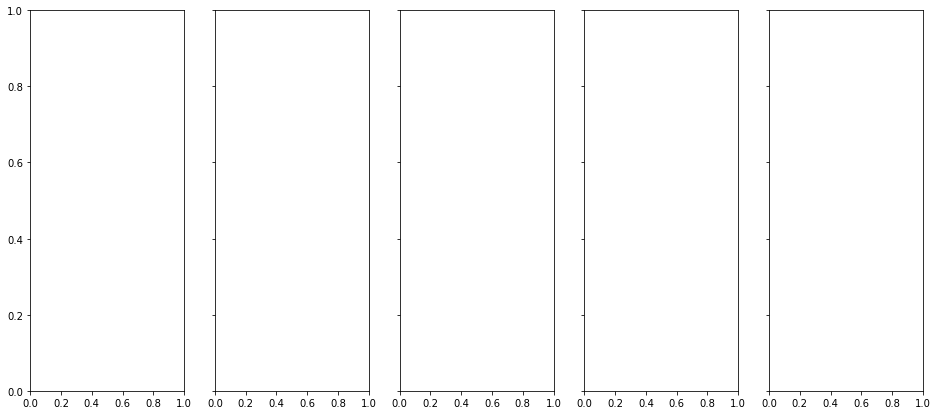

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 7), sharey=True)
fs = 10 #fontsize


### PANEL 1
(df200*10**(-6)).plot.bar(stacked=True, ax=axes[0], color = pal2, width=0.3, linewidth=0.5,edgecolor='black')
axes[0].set_title('(a) Grid-based + Huizinga \n', fontsize=fs)
axes[0].set_ylabel('Expected annual damage in million Euro per year')

handles_0, labels_0 = axes[0].get_legend_handles_labels() #inverse the order of the labels
axes[0].legend(handles_0[::-1], labels_0[::-1])

for tick in axes[0].get_xticklabels():
    tick.set_rotation(0)

### PANEL 2
(df_HZ*10**(-6)).plot.bar(stacked=True, ax=axes[1],color=brew_1, width=0.1,linewidth=0.5,edgecolor='black')
axes[1].set_title('(b) Object-based + Huizinga* \n', fontsize=fs)
axes[1].set_xticklabels(['(3) OSM + Huizinga*'])
handles_2, labels_2 = axes[1].get_legend_handles_labels() #inverse the order of the labels
axes[1].legend(handles_2[::-1], labels_2[::-1])

for tick in axes[1].get_xticklabels(): #rotate the axis label
    tick.set_rotation(0)

### PANEL 3
bar.plot.bar(stacked=True, ax=axes[2], color=brew_1, width=0.1,linewidth=0.5,edgecolor='black')
axes[2].set_title('(c) Object-based + new curves \n Best estimate', fontsize=fs)

handles_2, labels_2 = axes[2].get_legend_handles_labels() #inverse the order of the labels
axes[2].legend(handles_2[::-1], labels_2[::-1])
axes[2].set_xticklabels(['(4) OSM + new curves']) #overrule the name of the index


for tick in axes[2].get_xticklabels():
    tick.set_rotation(0)
    
### PANEL 4   
sns.violinplot(df_samples.T.sum(axis=1)*10**(-6),orient='v',ax=axes[3],width=0.4,linewidth=1,cut=0,color='grey')    
axes[3].set_title('(d) Object-based + new curves\n Sampled uncertainty', fontsize=fs)
axes[3].set_xticklabels(['Probability distribution'])

### PANEL 5
axes[4].bxp(stats, showfliers=False)
axes[4].set_title('(e) Object-based + new curves\n Extremes of outcome space ', fontsize=fs)
axes[4].set_ylim(bottom=0)

#fig.suptitle('River flood risk of the European road network', fontsize=16)
plt.savefig(r"Paper_fig4.png", dpi=400, bbox_inches="tight")

### Load all the LUISA stuff (similar to figure 4 IPYNB)

In [23]:
### Load the NUTS-3 EADS from all the LUISA pickles; these were created with LUISA_EAD_multi.ipynb
main_folder = "D:\\Europe_trade_disruptions"
LUISA_pickles_path = os.path.join(main_folder,"JRC_damages\\LUISA_pickles")
LUISA_infra_pkls = [x for x in os.listdir(LUISA_pickles_path) if x.endswith("infra.pkl")]
LUISA_infra_df = pd.DataFrame()
for pkl in tqdm(LUISA_infra_pkls):
    LUISA_infra_df = LUISA_infra_df.append(pd.read_pickle(os.path.join(LUISA_pickles_path,pkl)))
df_inf = LUISA_infra_df.copy()
df_inf.index.name = 'NUTS-3'

#ADD THE OVERARCHING NUTS-NAMES
df_inf['NUTS-2'] = df_inf.index.map(lambda x: NUTS_down(x))
df_inf['NUTS-0'] = df_inf.index.map(lambda x: NUTS_down(NUTS_down(NUTS_down(x))))
df_inf['sum'] = df_inf.sum(axis=1, numeric_only=True)


100%|██████████████████████████████████████████████████████████████████████████████| 1433/1433 [00:17<00:00, 81.43it/s]


In [24]:
df_inf_N0 = df_inf.groupby('NUTS-0').sum().drop(['sum'],axis=1)
df_inf_N0 = df_inf_N0.loc[:, (df_inf_N0 != 0).any(axis=0)] #drop the empty columns before plotting
df_inf_N0.head()

,1111,1121,1122,1123,1211,1212,1213,1221,1222,1230,1241,1242,1410,1422,2110,2310,2420,3110,3210,3240,3310,4100,5110,5120,5230
NUTS-0,,,,,,,,,,,,,,,,,,,,,,,,,
AL,2956.700000,1.157493e+04,35412.360000,18956.310000,2.148347e+04,187.420000,0.000000,1.792274e+05,0.000000,3002.110000,54461.96,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT,217185.118070,9.395351e+05,887348.493309,210877.662085,1.260108e+06,436739.222687,109354.957604,7.086000e+06,243.346203,551643.732922,443262.49,2187.00,159388.850061,85663.075177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BE,60982.796302,3.511544e+05,398394.703702,135177.084135,1.447278e+06,174489.310000,98179.904818,1.871703e+06,0.000000,469632.619626,27960.69,0.00,41610.740000,40555.850000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BG,5158.030000,6.069548e+04,81046.440000,39748.810000,3.458357e+05,4948.520000,10782.790000,8.381795e+05,0.000000,24706.140000,37842.71,146.67,12553.930000,5009.350000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CH,216548.320000,1.064747e+06,992132.700000,343352.270000,1.950108e+06,515248.460000,107504.290000,6.516137e+06,4093.600000,3790.810000,1965458.22,0.00,40798.750000,136134.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Load the CORINE results

In [25]:
CORINE_pickles_path = "../corine_temp"
CORINE_infra_pkls = [x for x in os.listdir(CORINE_pickles_path) if x.endswith("infra.pkl")]
CORINE_infra_df = pd.DataFrame()
for pkl in tqdm(CORINE_infra_pkls):
    CORINE_infra_df = CORINE_infra_df.append(pd.read_pickle(os.path.join(CORINE_pickles_path,pkl)))
df_inf2 = CORINE_infra_df.copy()
df_inf2.index.name = 'NUTS-3'

#ADD THE OVERARCHING NUTS-NAMES
df_inf2['NUTS-2'] = df_inf2.index.map(lambda x: NUTS_down(x))
df_inf2['NUTS-0'] = df_inf2.index.map(lambda x: NUTS_down(NUTS_down(NUTS_down(x))))
df_inf2.drop(labels='RO225',axis='index',inplace=True) #something weird happens in this region
df_inf2['sum'] = df_inf2.sum(axis=1, numeric_only=True)
df_inf2_N0 = df_inf2.groupby('NUTS-0').sum().drop(['sum'],axis=1)
df_inf2_N0 = df_inf2_N0.loc[:, (df_inf2_N0 != 0).any(axis=0)] #drop the empty columns before plotting
df_inf2_N0.head()

100%|█████████████████████████████████████████████████████████████████████████████| 1420/1420 [00:10<00:00, 138.86it/s]


,1,2,3,4,5,6,10,12,18,20,21,23,24,26,28,29,30,32,35,37,38,40,42,43,44
NUTS-0,,,,,,,,,,,,,,,,,,,,,,,,,
AL,992.980000,1.216150e+05,1.954853e+04,311.040000,3002.110000,52727.76,0.000000,55728.56,648.76,39185.28,2097.22,1264.81,2821.66,75.76,531.2,16761.26,5271.09,1525.05,2101.45,3215.85,1718.68,7.353571e+05,7053.28,800.790000,679.42
AT,146347.828166,4.860787e+06,1.634625e+06,457939.323172,73408.667898,391538.90,46106.725417,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,9.247536e+06,0.00,0.000000,0.00
BE,75781.350000,2.032164e+06,1.388871e+06,532789.010000,289440.539897,8296.88,1772.770000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,8.166709e+05,0.00,940371.784686,0.00
BG,0.000000,3.858209e+05,3.520332e+05,101394.730000,46490.010000,23447.94,15360.180000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.559103e+06,0.00,0.000000,0.00
CH,112888.250000,4.398947e+06,2.192243e+06,501571.270000,138293.110000,1363745.28,33434.920000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.365148e+06,0.00,0.000000,0.00


In [26]:
#ADD THE LABELING FOR LUISA

from collections import OrderedDict

sum_dict = OrderedDict({
            1221:[1221],
            11:[1111,1121,1122,1123],
            121:[1211,1212,1213]
            })

#select columns that have not been grouped 
used_cols = []
for i in sum_dict:
    used_cols.extend(sum_dict[i])
sum_dict[0] = [j for j in list(df_inf_N0.columns) if j not in used_cols]

#sum_labels = OrderedDict({
#            1221: 'Road and rail networks and \n associated land (LUISA 1221)',
#            11: 'Urban fabric (LUISA 11XX)',
#            121: 'Industrial or commercial \n units (LUISA 121X)',
#            0: 'Other'})

sum_labels = OrderedDict({
            1221: 'Road and rail \n networks and \n associated land',
            11: 'Urban fabric',
            121: 'Industrial or \n commercial \n units',
            5: 'Water',
            0: 'Other'})

colours = OrderedDict({
            1221: '#FFA500',
            11: '#DC143C',
            121: '#EBD6FD',
            0: '#000000'})
pal = list(colours.values()) #create palette from colours

df_inf_N0_agg = pd.DataFrame()
for k, v in sum_dict.items():
    df_inf_N0_agg[k] = df_inf_N0[v].sum(axis=1)

In [27]:
#ADD THE LABELING FOR CORINE
#based on: D:\Europe_trade_disruptions\JRC_landuse\Corine_2012_g100_clc12_V18_5a\Legend\clc_legend.xls

sum_dict2 = OrderedDict({
            1221:[4], #comp code 4 corresponds to CLC3 122 ##was 122!
            11:[1,2], # 111,112
            121:[3], # 121
            5:[40,43,44] #511, 522, 523 
            })

used_cols2 = []
for i in sum_dict2:
    used_cols2.extend(sum_dict2[i])
sum_dict2[0] = [j for j in list(df_inf2_N0.columns) if j not in used_cols2]

colours2 = OrderedDict({
            1221: '#FFA500',
            11: '#DC143C',
            121: '#EBD6FD',
            5: '#2264aa', 
            0: '#000000'})
pal2 = list(colours2.values()) #create palette from colours

df_inf2_N0_agg = pd.DataFrame()
for k, v in sum_dict2.items():
    df_inf2_N0_agg[k] = df_inf2_N0[v].sum(axis=1)